# 1 : CRIME DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crime_data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/CLUSTERING/crime_data.csv')

In [3]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime_data.duplicated().sum()

0

In [6]:
crime_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
#NORMALIZATION
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_crime_data_df=scalar.fit_transform(crime_data)

In [9]:
scaled_crime_data_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_crime_data_df)

KMeans(n_clusters=3, random_state=0)

In [11]:
kmeans.inertia_

80.0888613219962

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_data_df)
    wcss.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


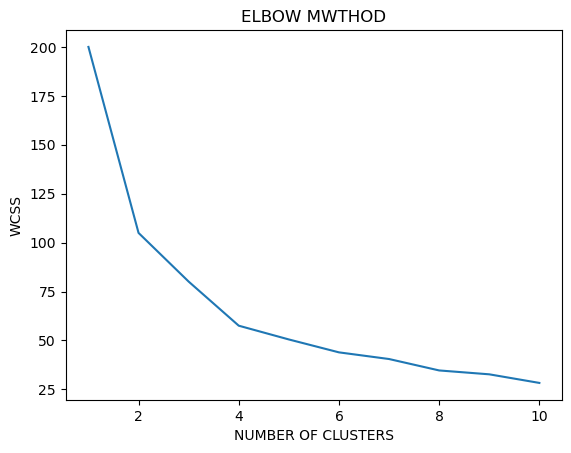

In [13]:
plt.plot(range(1,11),wcss)
plt.title("ELBOW MWTHOD")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WCSS")
plt.show()

In [14]:
#BUILD CLUSTER ALGORITHM
from sklearn.cluster import KMeans
final_model=KMeans(3,random_state=10)
final_model.fit(scaled_crime_data_df)

KMeans(n_clusters=3, random_state=10)

In [15]:
#ASSIGN CLUSTER TO THE DATASET
crime_data["Clusterid"]=final_model.labels_
crime_data

,Murder,Assault,UrbanPop,Rape,Clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [16]:
#STANDARDIZED VALUES
final_model.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524]])

In [17]:
crime_data.groupby("Clusterid").agg(["mean"])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Clusterid,,,,
0,12.165000,255.250,68.400000,29.16500
1,5.656250,138.875,73.875000,18.78125
2,3.971429,86.500,51.928571,12.70000


In [18]:
crime_data[crime_data['Clusterid']==0]

,Murder,Assault,UrbanPop,Rape,Clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
12,10.4,249,83,24.0,0
17,15.4,249,66,22.2,0
19,11.3,300,67,27.8,0


In [19]:
crime_data[crime_data['Clusterid']==1]

,Murder,Assault,UrbanPop,Rape,Clusterid
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
10,5.3,46,83,20.2,1
13,7.2,113,65,21.0,1
15,6.0,115,66,18.0,1
20,4.4,149,85,16.3,1
29,7.4,159,89,18.8,1
34,7.3,120,75,21.4,1
35,6.6,151,68,20.0,1
36,4.9,159,67,29.3,1


In [20]:
crime_data[crime_data['Clusterid']==2]

,Murder,Assault,UrbanPop,Rape,Clusterid
3,8.8,190,50,19.5,2
11,2.6,120,54,14.2,2
14,2.2,56,57,11.3,2
16,9.7,109,52,16.3,2
18,2.1,83,51,7.8,2
22,2.7,72,66,14.9,2
25,6.0,109,53,16.4,2
26,4.3,102,62,16.5,2
28,2.1,57,56,9.5,2
33,0.8,45,44,7.3,2


# HIERARCHICAL CLUSTERING

In [21]:
crime_data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/CLUSTERING/crime_data.csv')

In [22]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [24]:
#NORMALIZATION FUNCTION
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [25]:
#NORMALIZED DATAFRAME
df_norm=norm_func(crime_data.iloc[:,1:])

In [26]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [27]:
#CREATING CLUSTERS
HC=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")

In [28]:
HC

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [29]:
#SAVE THE CLUSTERS FOR CHART
y_HC=HC.fit_predict(df_norm)

In [30]:
y_HC

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [31]:
clusters=pd.DataFrame(y_HC,columns=["clusters"])

In [32]:
crime_data["H_clusterid"]=clusters

In [33]:
crime_data.sort_values("H_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_clusterid
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


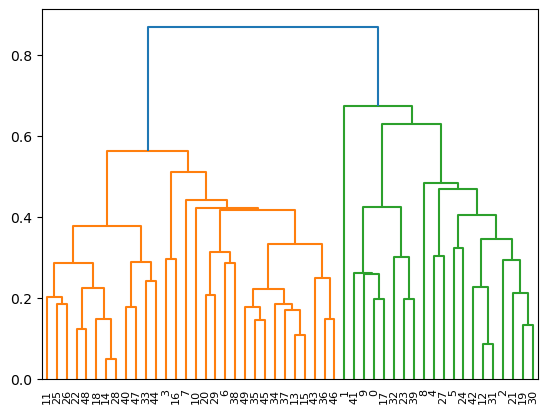

In [34]:
#CREATING DENDROGRAM
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="average"),color_threshold=0.7)

In [35]:
crime_data.groupby('H_clusterid').agg(['mean'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_11316\502154779.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime_data.groupby('H_clusterid').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
H_clusterid,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [36]:
crime_data.groupby('H_clusterid').agg(['count'])

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
,count,count,count,count,count
H_clusterid,,,,,
0,20,20,20,20,20
1,20,20,20,20,20
2,10,10,10,10,10


# DBSCAN

In [37]:
crime_data=pd.read_csv('C://Users/Hp/Desktop/Data Science Assignment/CLUSTERING/crime_data.csv')

In [38]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [39]:
data=crime_data.drop(['Unnamed: 0'],axis=1)

In [40]:
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [41]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [42]:
scalar=MinMaxScaler()
df=scalar.fit_transform(data)
df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [43]:
dbscan=DBSCAN(eps=0.2,min_samples=2)
dbscan.fit_predict(df)

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [44]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [45]:
dbs_df1=pd.DataFrame(dbscan.labels_,columns=['clusters'])
dbs_df1.head()

,clusters
0,0
1,-1
2,-1
3,-1
4,-1


In [46]:
clustered=pd.concat([crime_data,dbs_df1],axis=1)
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [47]:
clustered.groupby('clusters').agg(['mean'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_11316\1441329174.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  clustered.groupby('clusters').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
-1,8.915000,198.100000,69.950000,24.635000
0,14.300000,242.500000,62.000000,21.700000
1,4.644444,99.222222,59.000000,14.577778
2,10.750000,251.500000,84.500000,25.050000
3,11.600000,280.000000,70.333333,31.666667
4,15.250000,269.000000,46.000000,19.800000
5,4.033333,141.333333,73.333333,26.133333


In [48]:
clustered.groupby('Unnamed: 0').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,clusters
,mean,mean,mean,mean,mean
Unnamed: 0,,,,,
Alabama,13.2,236.0,58.0,21.2,0.0
Alaska,10.0,263.0,48.0,44.5,-1.0
Arizona,8.1,294.0,80.0,31.0,-1.0
Arkansas,8.8,190.0,50.0,19.5,-1.0
California,9.0,276.0,91.0,40.6,-1.0
Colorado,7.9,204.0,78.0,38.7,-1.0
Connecticut,3.3,110.0,77.0,11.1,-1.0
Delaware,5.9,238.0,72.0,15.8,-1.0


# 2 : EAST WEST AIRLINES

In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [50]:
Data= pd.read_excel('C://Users/Hp/Desktop/Data Science Assignment/CLUSTERING/EastWestAirlines.xlsx',sheet_name='data')

In [51]:
Data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## EDA

In [52]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [53]:
Data.duplicated().sum()

0

In [54]:
Data=Data.drop(['ID','Award'],axis=1)

# K-MEANS

In [55]:
#NORMALIZATION FUNCTION
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaled_Data_df=Scaler.fit_transform(Data)

In [56]:
Scaled_Data_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [57]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(Scaled_Data_df)

KMeans(n_clusters=5, random_state=0)

In [58]:
kmeans.inertia_

20348.78522308945

In [59]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Scaled_Data_df)
    Wcss.append(kmeans.inertia_)

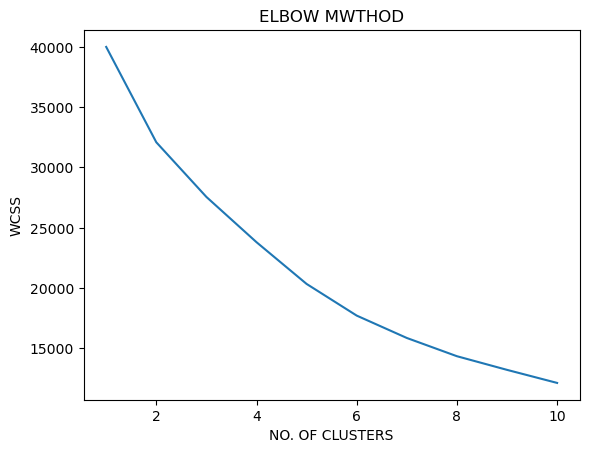

In [60]:
plt.plot(range(1,11),Wcss)
plt.title("ELBOW MWTHOD")
plt.xlabel("NO. OF CLUSTERS")
plt.ylabel("WCSS")
plt.show()

In [61]:
#BUILDIND A CLUSTER ALGORITHM
from sklearn.cluster import KMeans
final_model=KMeans(5,random_state=10)
final_model.fit(Scaled_Data_df)

KMeans(n_clusters=5, random_state=10)

In [62]:
final_model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
#ASSIGN CLUSTERS TO THE DATASET
Data['Cluster ID']=final_model.labels_

In [64]:
Data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,1


In [65]:
#STANDARDIZED VALUES
final_model.cluster_centers_

array([[ 1.19281775e+00,  8.63071170e-01,  1.14070060e-01,
        -9.82418871e-02, -6.27665798e-02,  6.55719005e-01,
         1.62144197e+00,  3.58438608e+00,  3.86822050e+00,
         2.99433970e-01],
       [-3.06367645e-01, -4.84966784e-02, -6.53398279e-01,
        -9.82418871e-02, -6.06602799e-02, -5.38937093e-01,
        -5.35157351e-01, -1.76506104e-01, -1.91523140e-01,
        -2.06108710e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01],
       [ 4.06977952e-01, -7.08108521e-03,  1.17201045e+00,
        -9.82418871e-02, -5.51888853e-02,  8.61259887e-01,
         7.35687487e-01, -1.01885935e-01, -1.12349620e-01,
         3.35623604e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.

In [66]:
Data.groupby('Cluster ID').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster ID,,,,,,,,,,
0,193793.299363,811.757962,2.216561,1.000000,1.000000,32979.114650,27.171975,5478.318471,16.044586,4736.853503
1,42730.784951,106.599095,1.159951,1.000000,1.000411,4130.621299,6.462993,212.941201,0.647204,3692.970395
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
3,114609.673077,138.636834,3.673077,1.000000,1.001479,37942.505178,18.666420,317.411982,0.947485,4811.580621
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233


In [67]:
Data[Data['Cluster ID']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID
21,185681,2024,1,1,1,13300,16,1800,9,6896,0
22,20584,0,1,1,1,3450,11,3450,11,6884,0
42,60313,0,1,1,1,10000,26,3250,9,7829,0
50,108137,0,1,1,1,6368,5,6368,5,6844,0
65,53914,0,3,1,1,33767,45,5550,29,6826,0
...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0
3917,130748,0,4,1,1,65510,37,6349,7,1545,0
3934,76595,0,1,1,1,10577,2,9577,1,1515,0


In [68]:
Data[Data['Cluster ID']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
5,16420,0,1,1,1,0,0,0,0,6942,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,1


In [69]:
Data[Data['Cluster ID']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID
106,96627,1182,1,1,3,49059,26,2300,9,6738,2
384,28193,0,5,1,4,103456,32,0,0,6980,2
850,25629,0,4,1,5,107308,36,600,2,5966,2
904,15835,0,2,1,5,112171,16,0,0,5825,2
1036,154664,0,4,1,3,73881,33,0,0,5769,2
1244,166465,0,4,1,4,98717,30,0,0,5531,2
1300,737514,0,3,1,4,43993,40,2150,7,5030,2
1878,128302,0,5,1,4,132263,32,400,2,4103,2
1917,82981,0,5,1,3,105325,44,1000,2,3964,2
1946,126873,0,4,1,5,95598,32,500,1,3880,2


In [70]:
Data[Data['Cluster ID']==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster ID
4,97752,0,4,1,1,43300,26,2077,4,6935,3
6,84914,0,3,1,1,27482,25,0,0,6994,3
9,104860,0,3,1,1,28426,28,1150,3,6931,3
11,96522,0,5,1,1,61105,19,0,0,6924,3
12,43382,0,2,1,1,11150,20,0,0,6924,3
...,...,...,...,...,...,...,...,...,...,...,...
3974,58387,0,3,1,1,14581,39,0,0,1435,3
3979,57793,0,3,1,1,20959,15,1198,3,1424,3
3980,28867,0,3,1,1,19169,28,0,0,1425,3
3985,59017,0,4,1,1,34746,25,0,0,1418,3


# HIERARCHICAL CLUSTERING

In [71]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [72]:
Data1= pd.read_excel('C://Users/Hp/Desktop/Data Science Assignment/CLUSTERING/EastWestAirlines.xlsx',sheet_name='data')

In [73]:
Data1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [74]:
Data2=Data1.drop(['ID','Award'],axis=1)
Data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


### I am using two transformation methods to check how clusters forms in two different transformation

In [75]:
from sklearn.preprocessing import normalize
Airline_norm=pd.DataFrame(normalize(Data2),columns=Data2.columns)

In [76]:
Airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718
...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509


In [77]:
Airline_std=pd.DataFrame(StandardScaler().fit_transform(Data2),columns=Data2.columns)
Airline_std

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


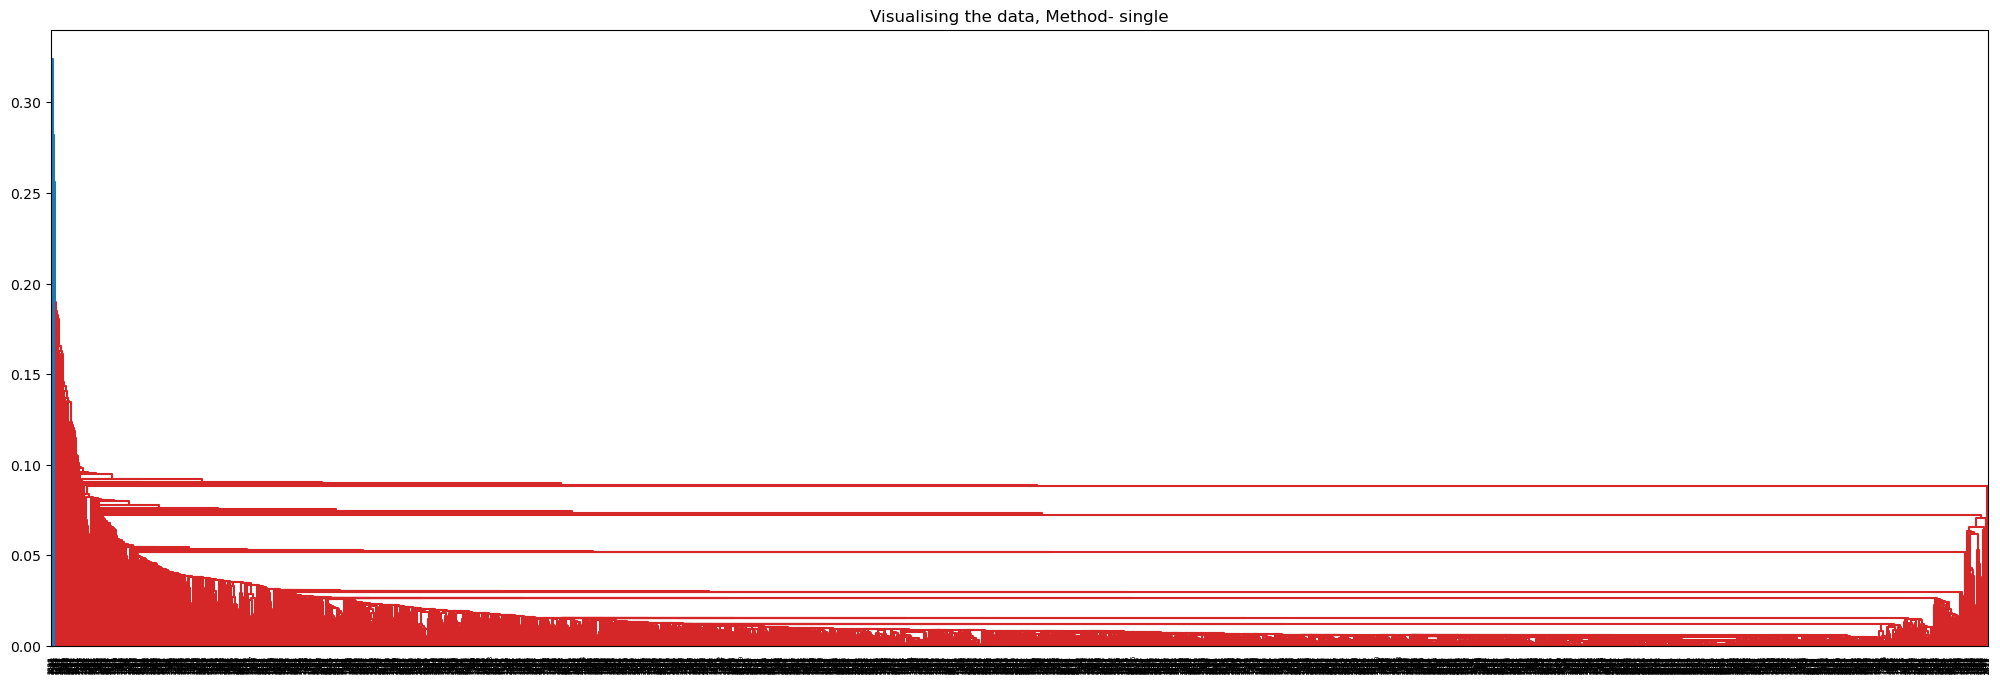

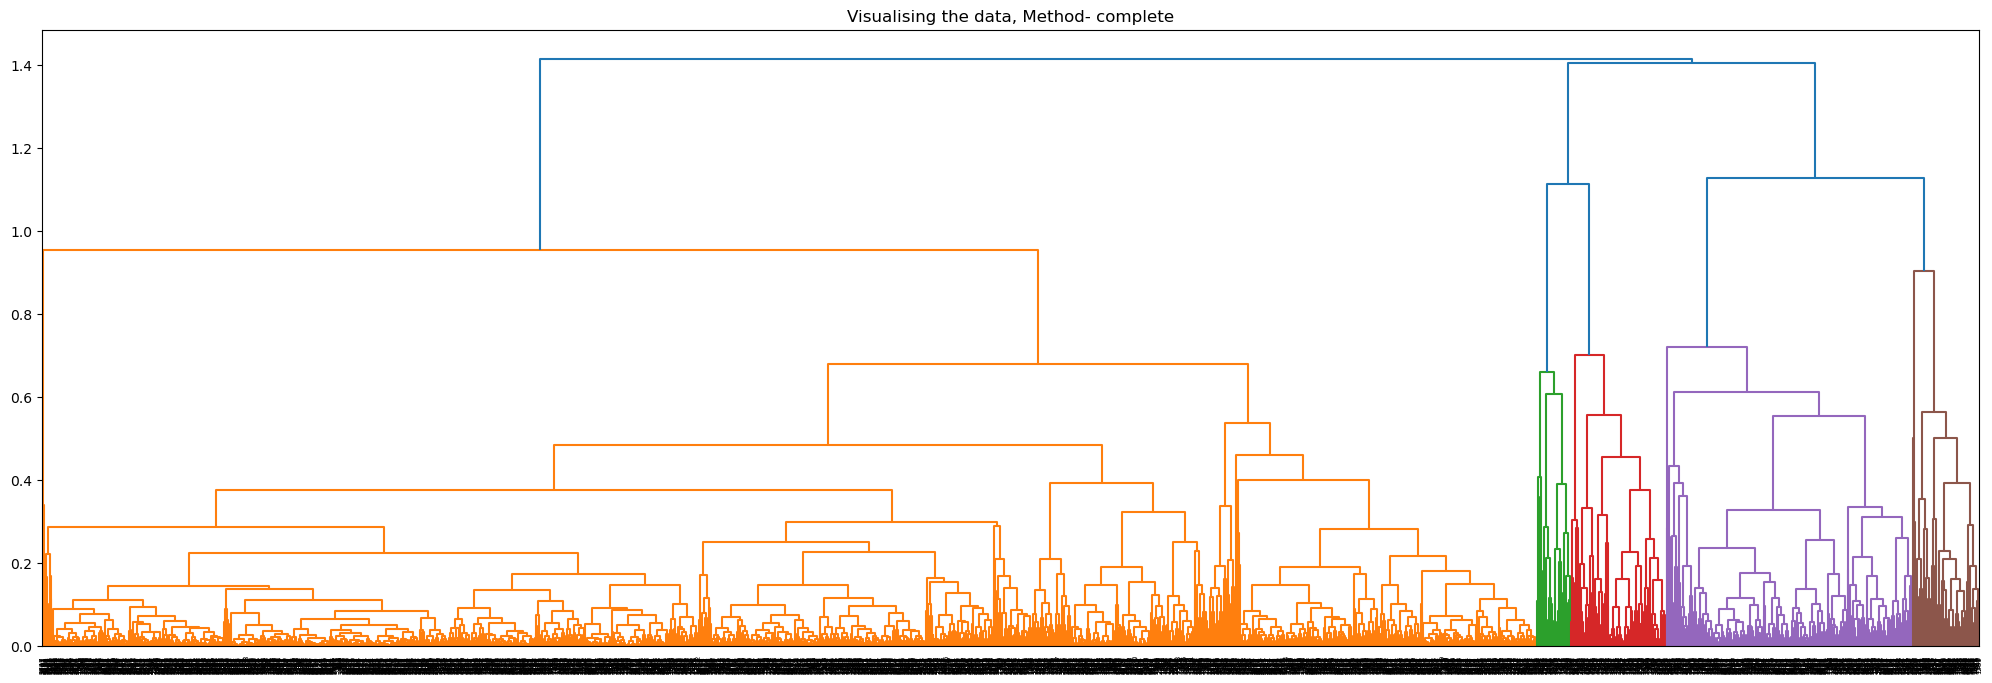

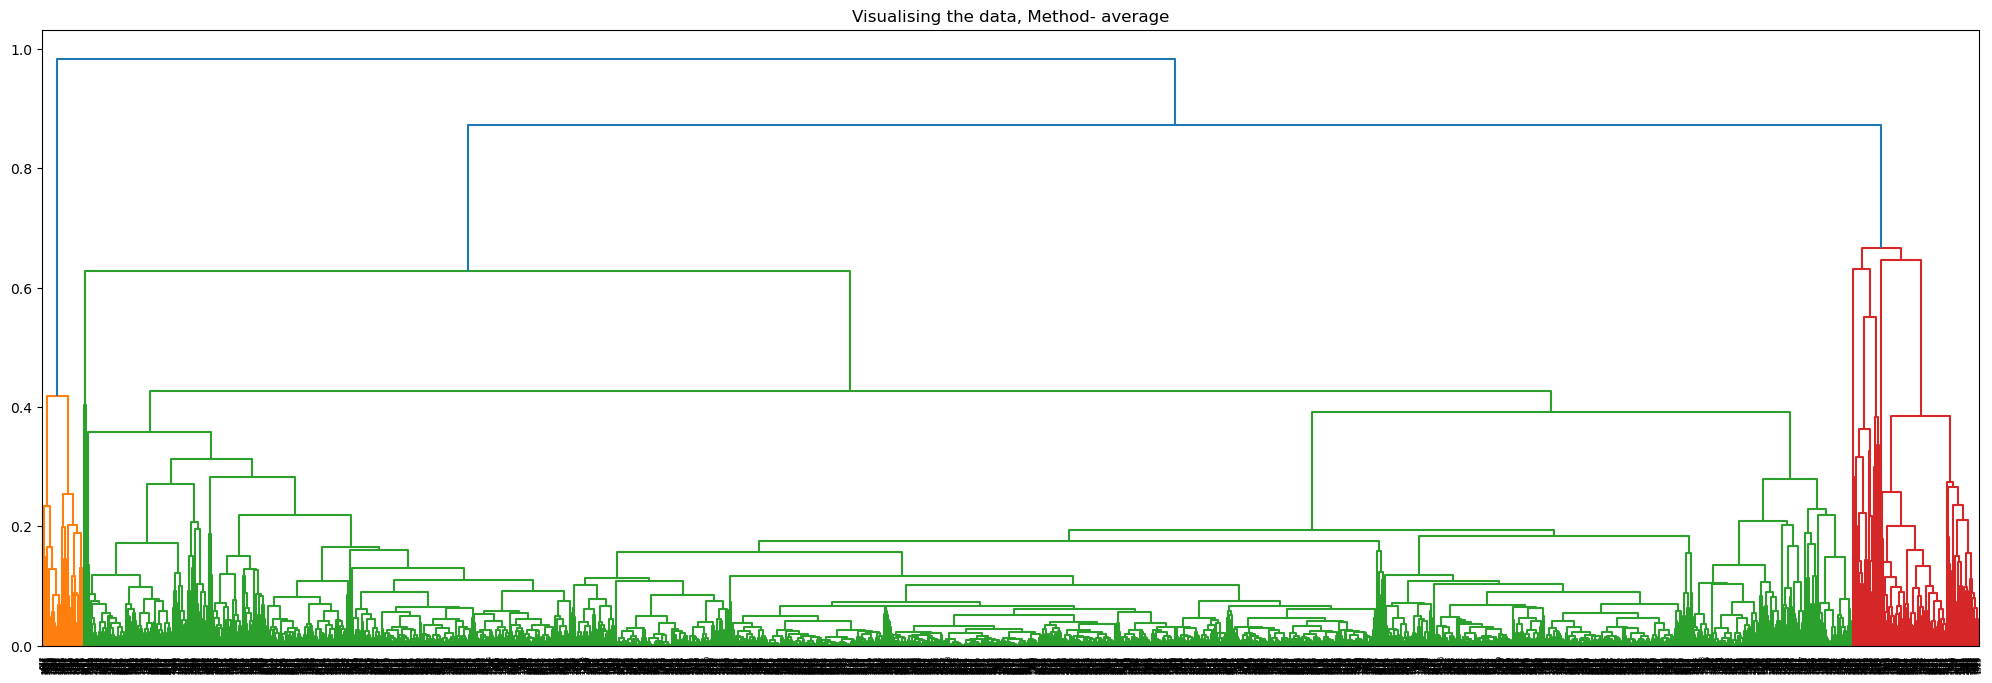

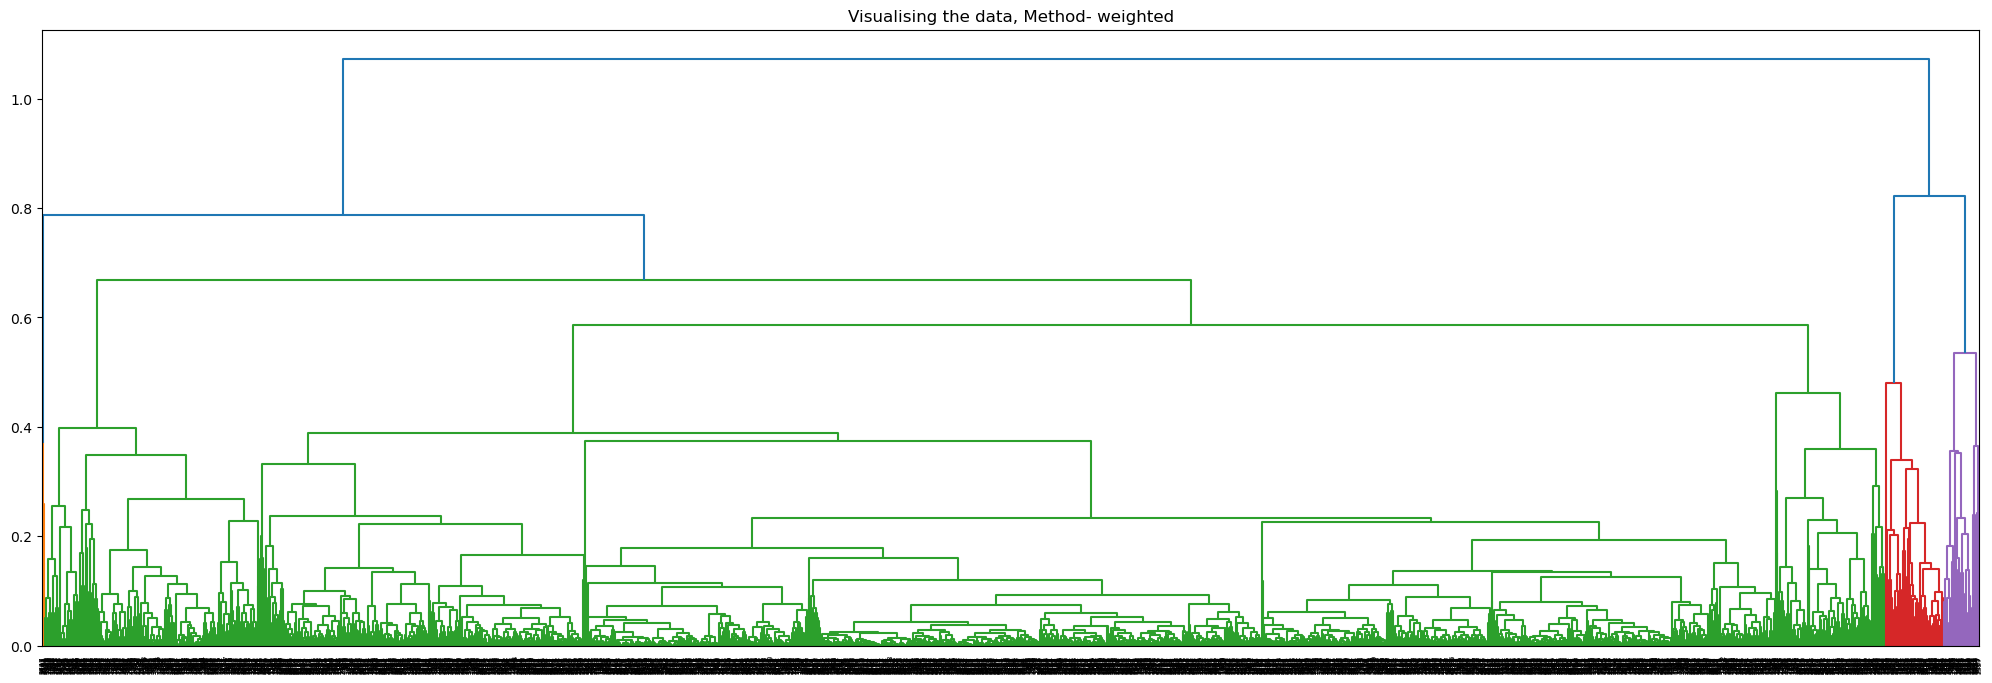

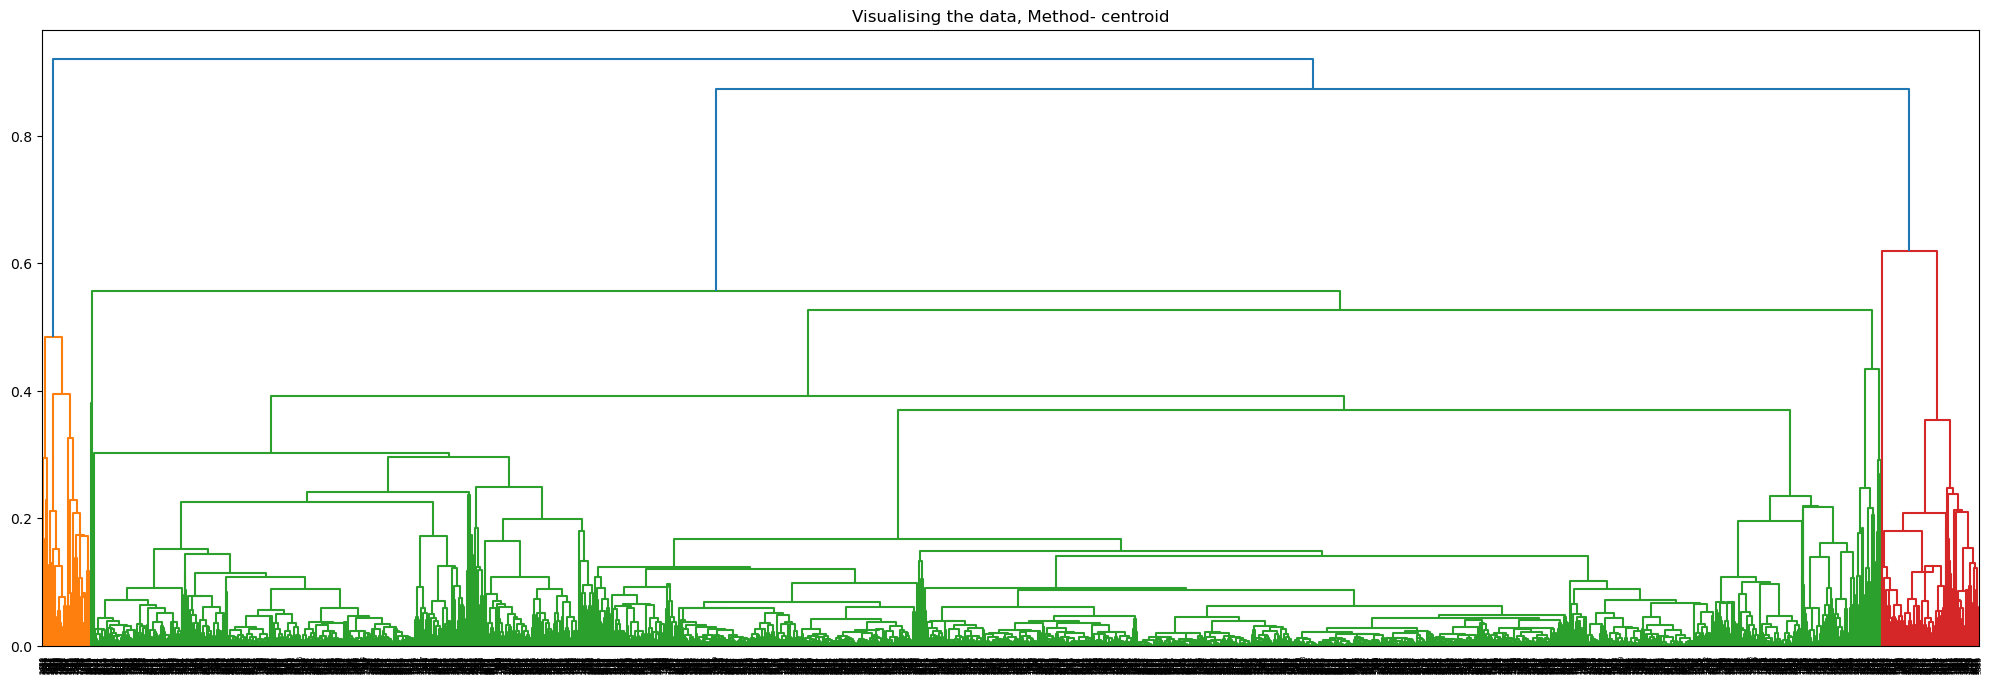

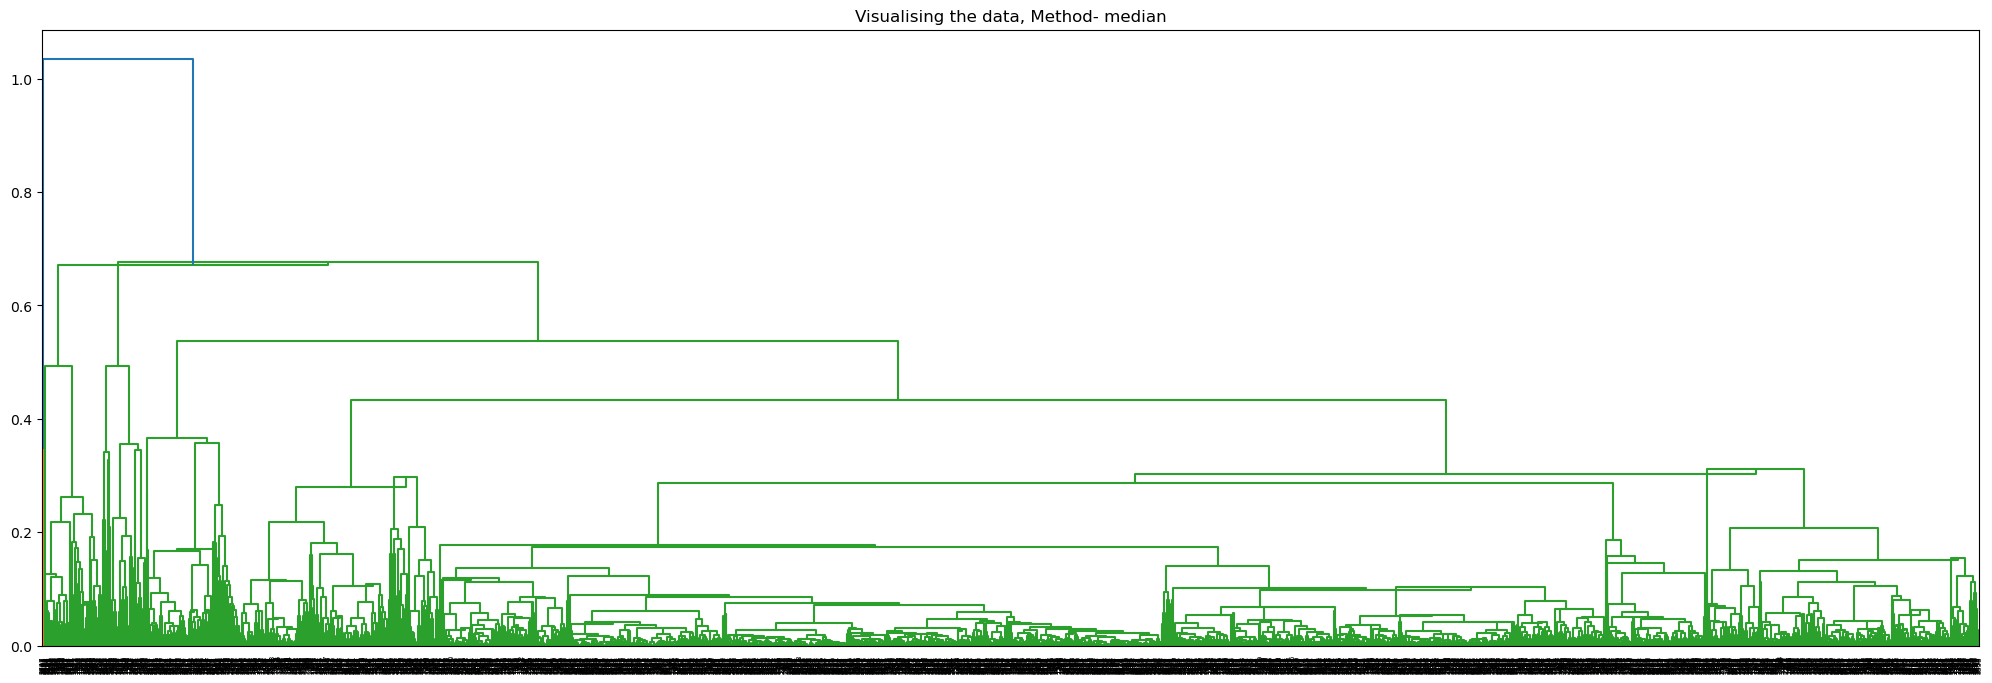

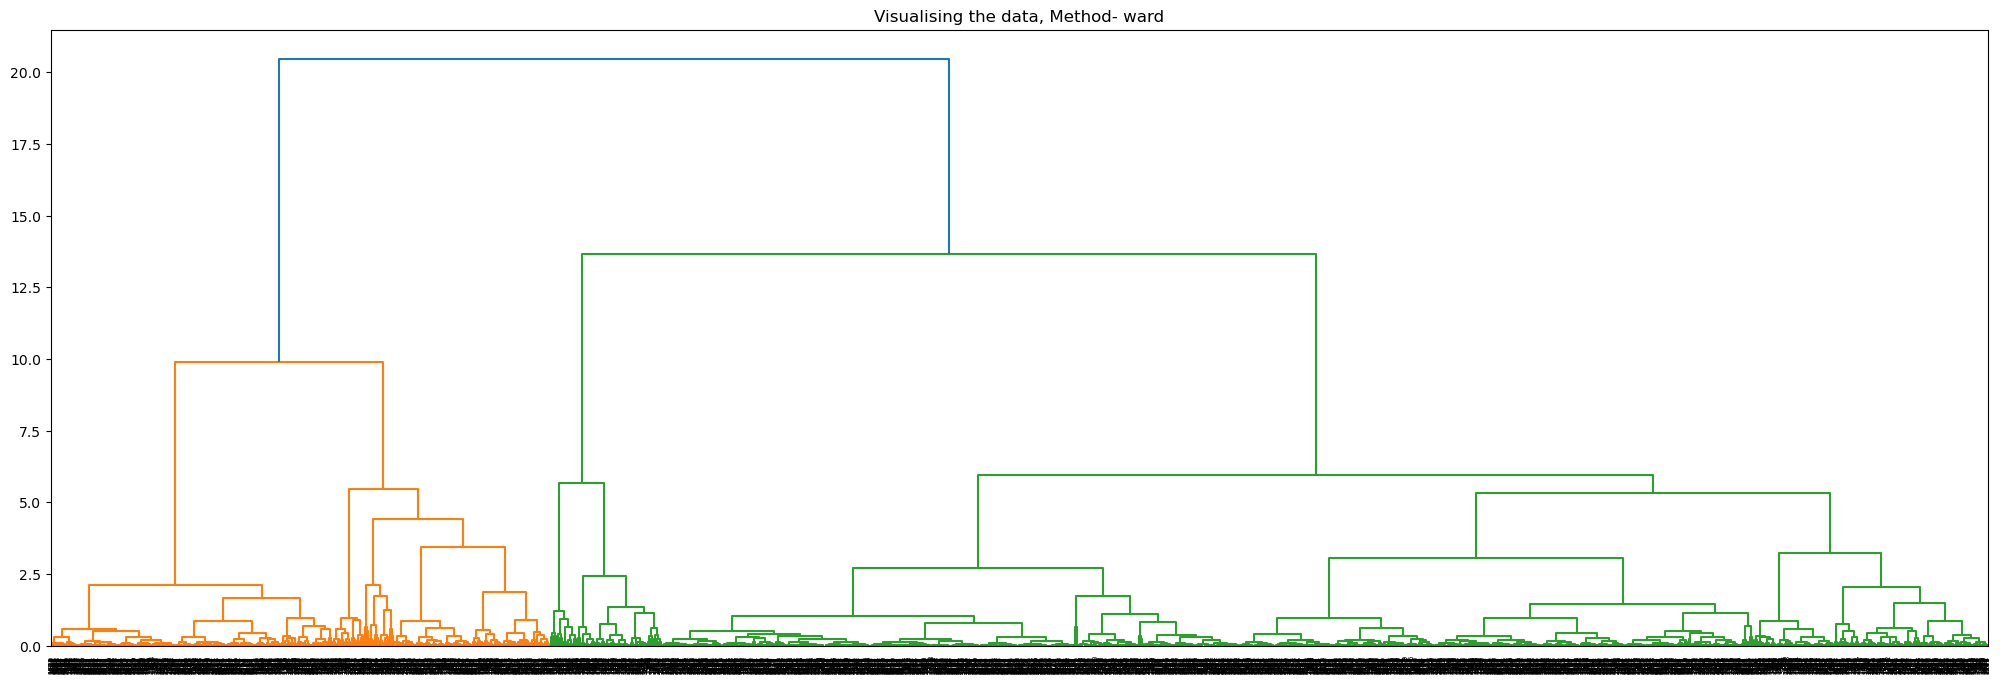

In [78]:
# Create dendrogram of normalization data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(25, 8))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(Airline_norm, method = methods,optimal_ordering=False))

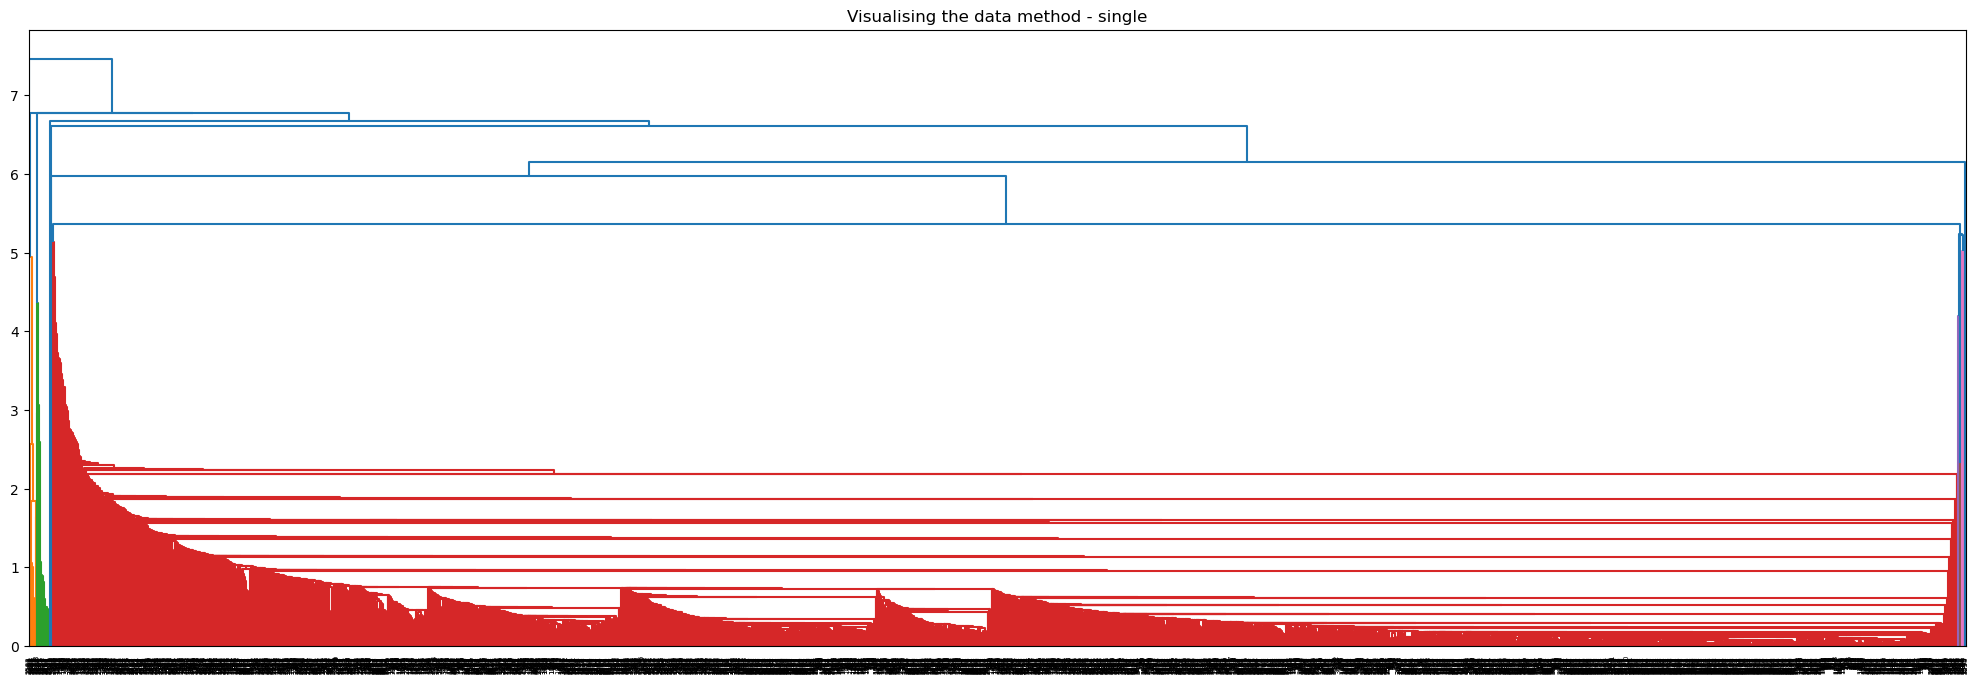

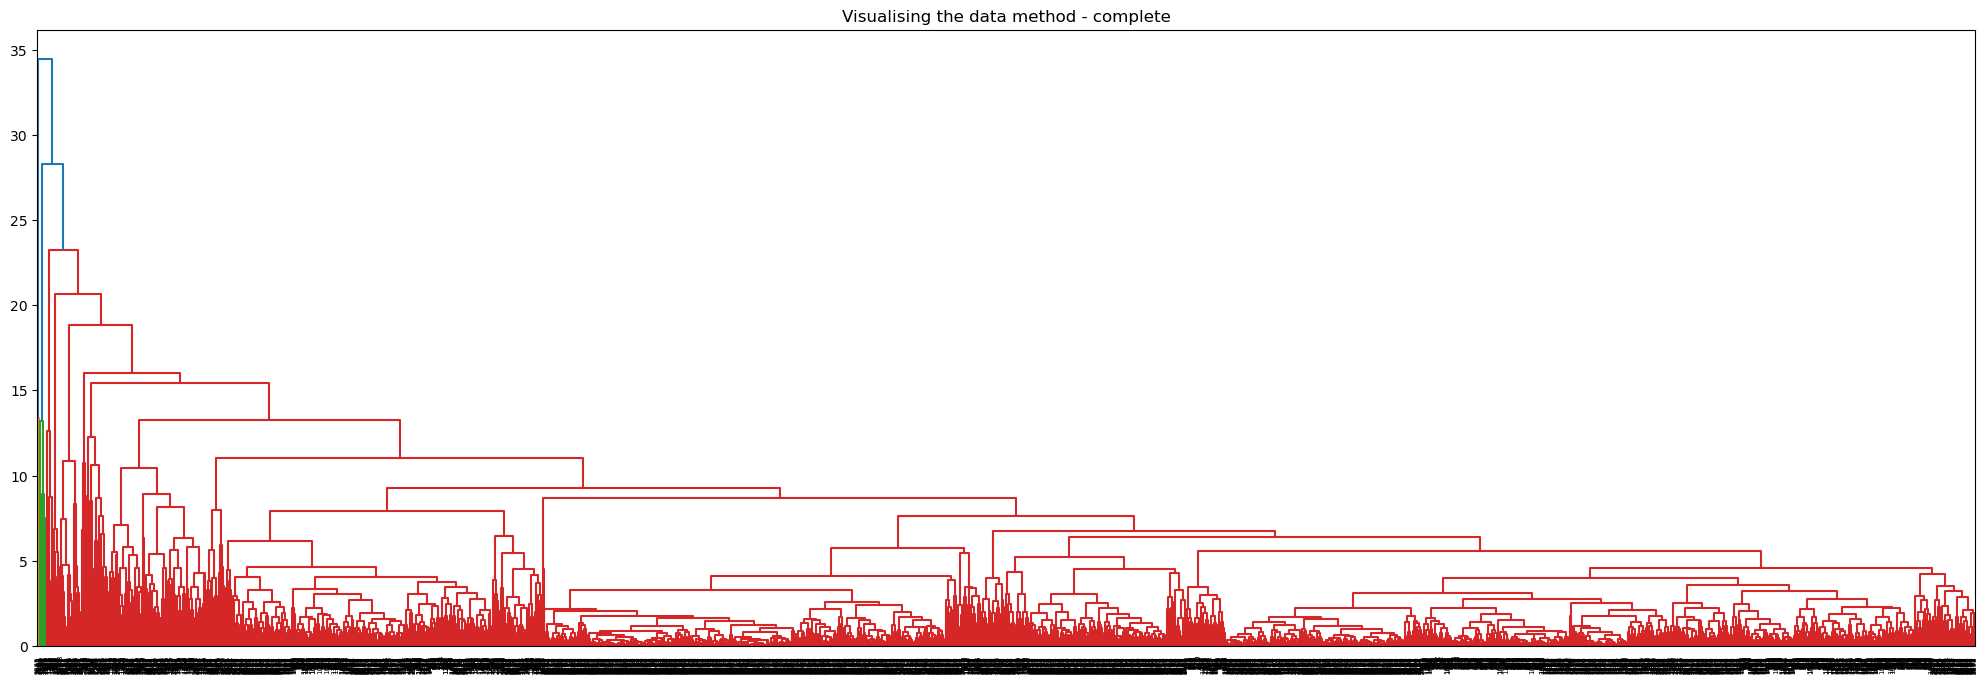

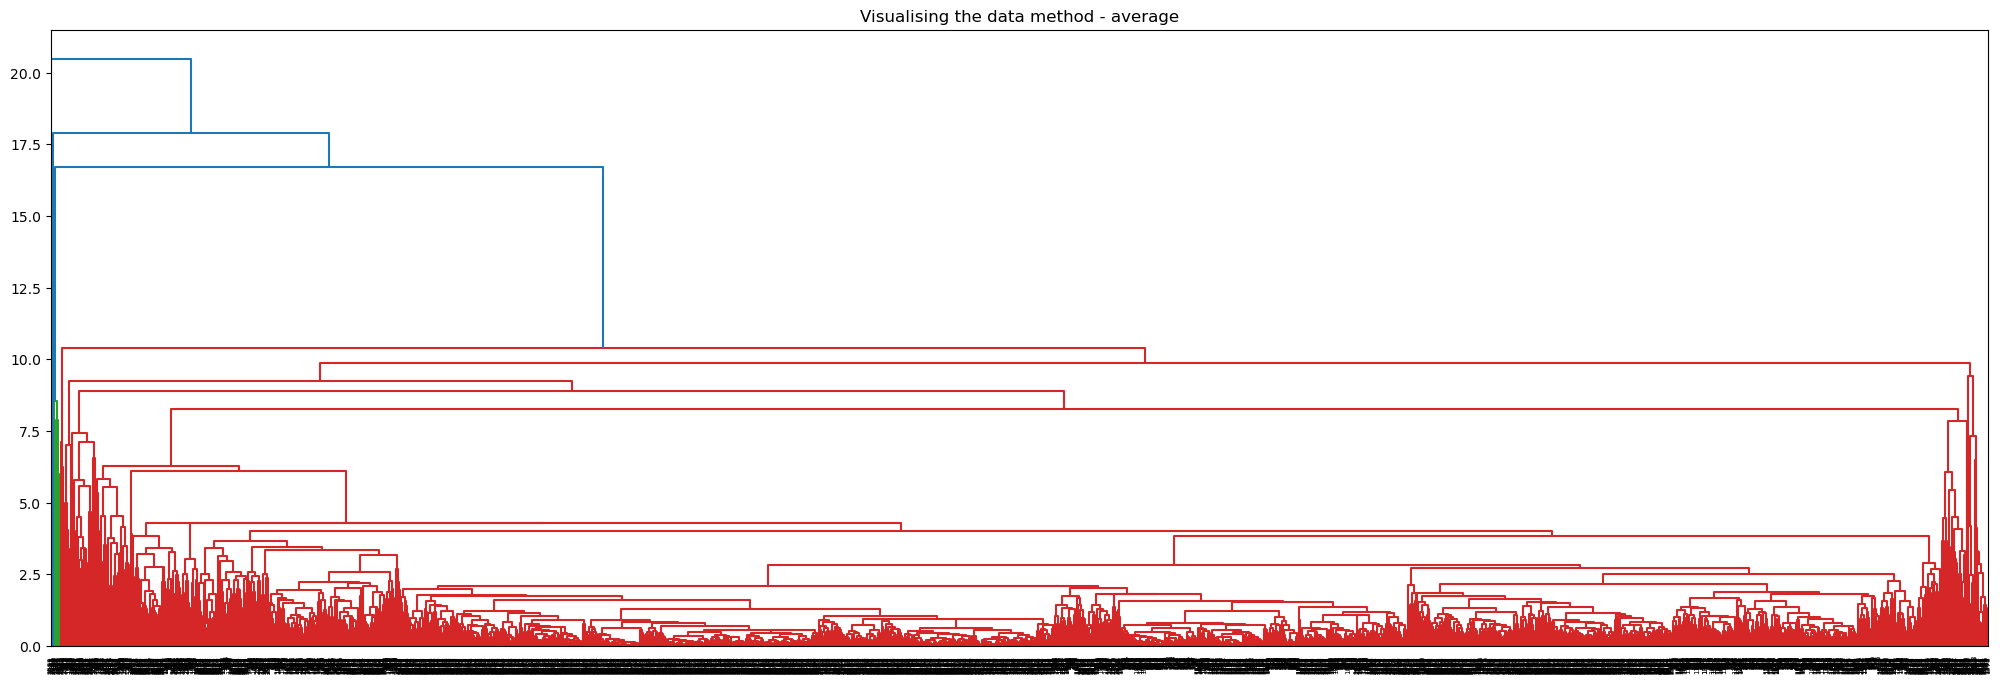

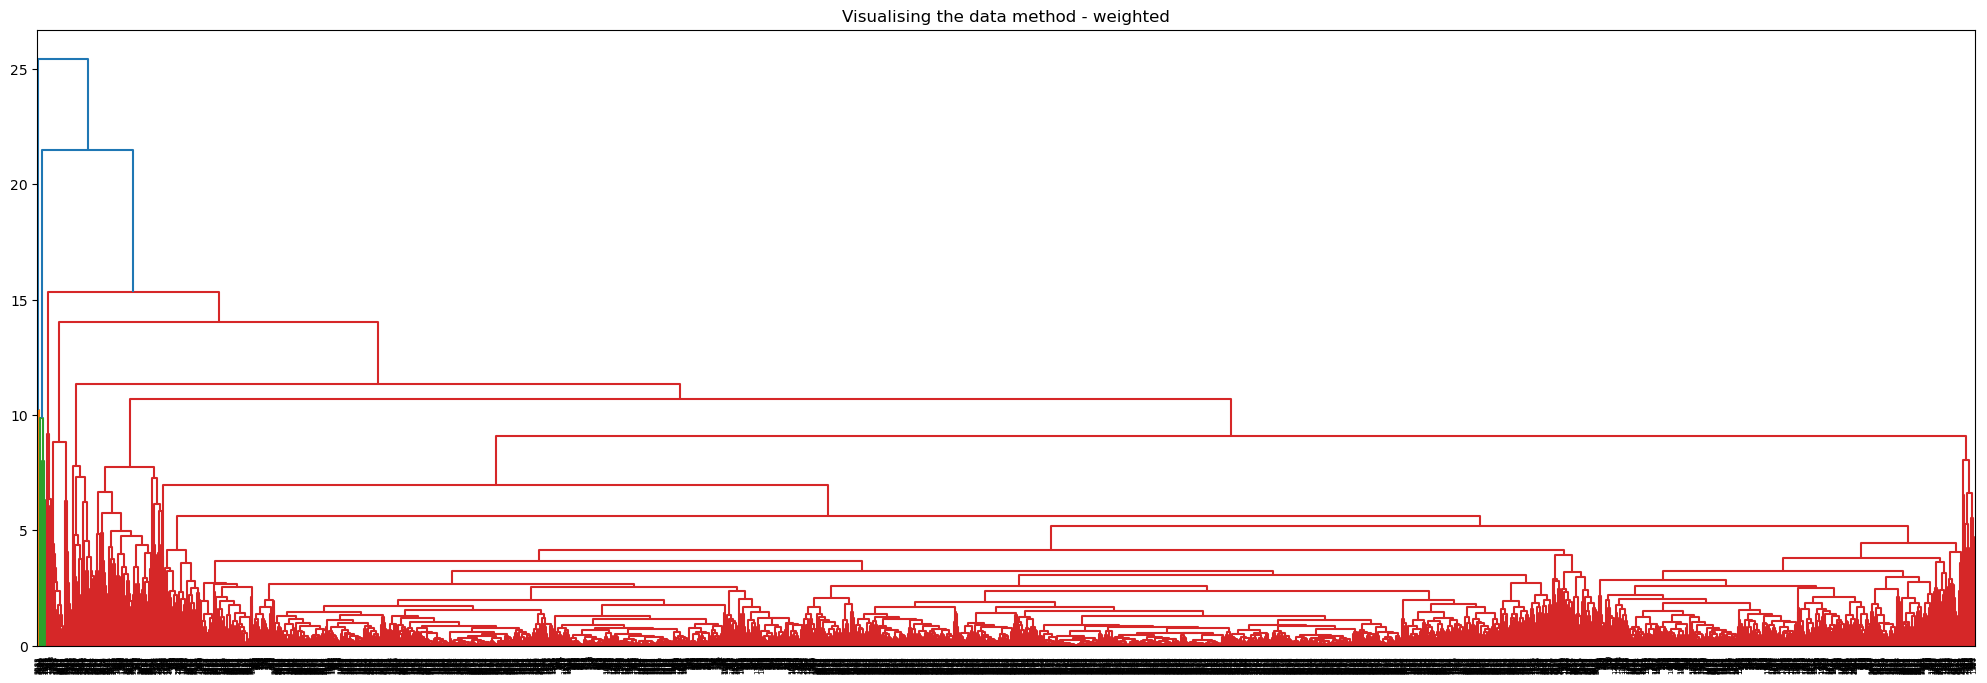

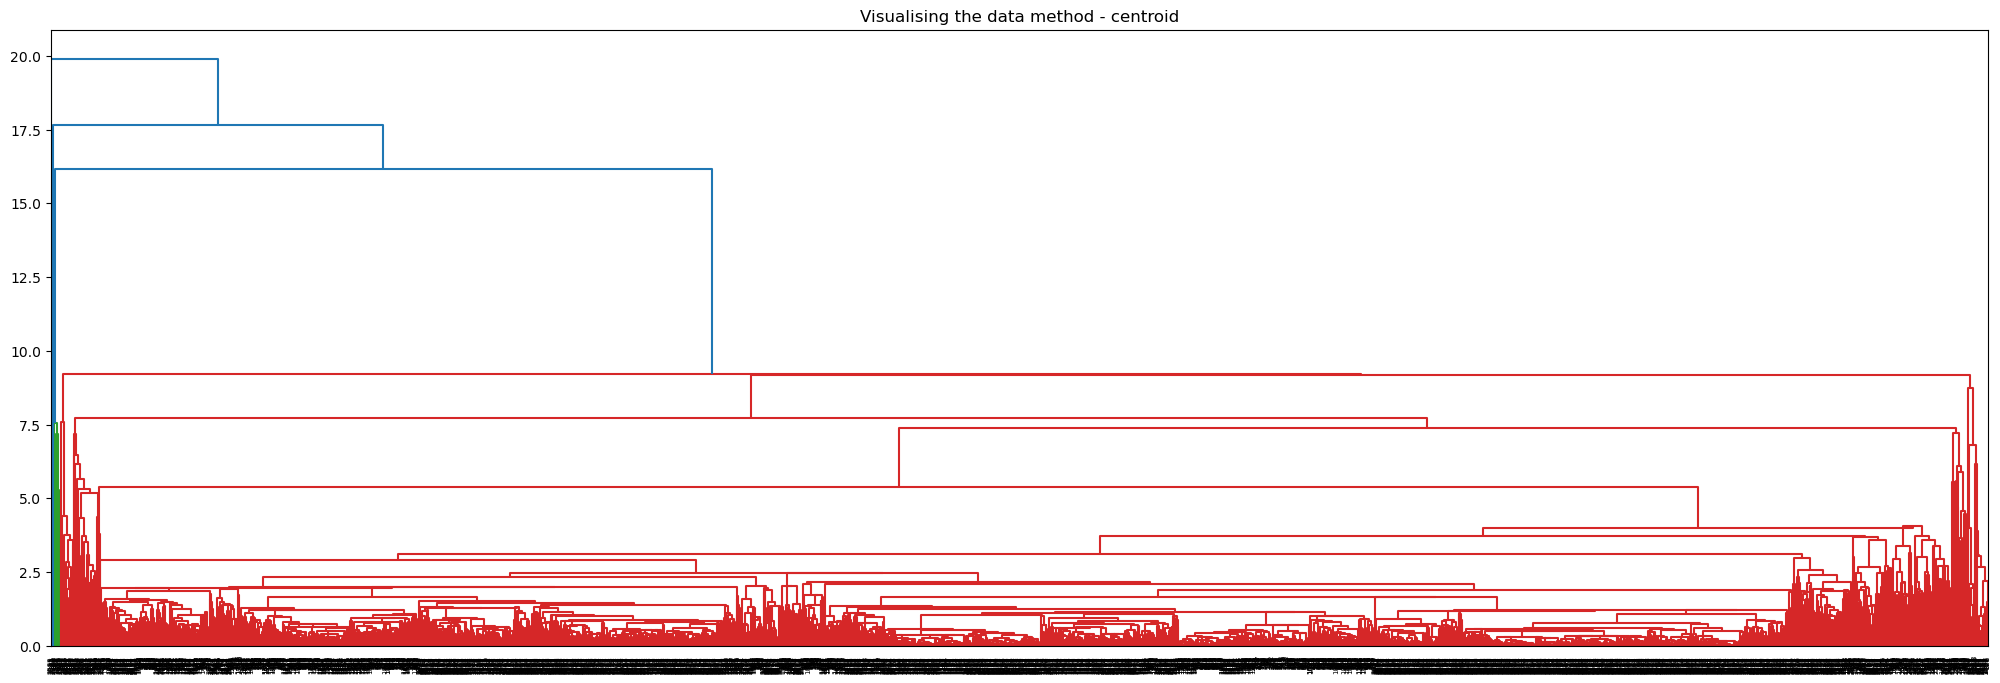

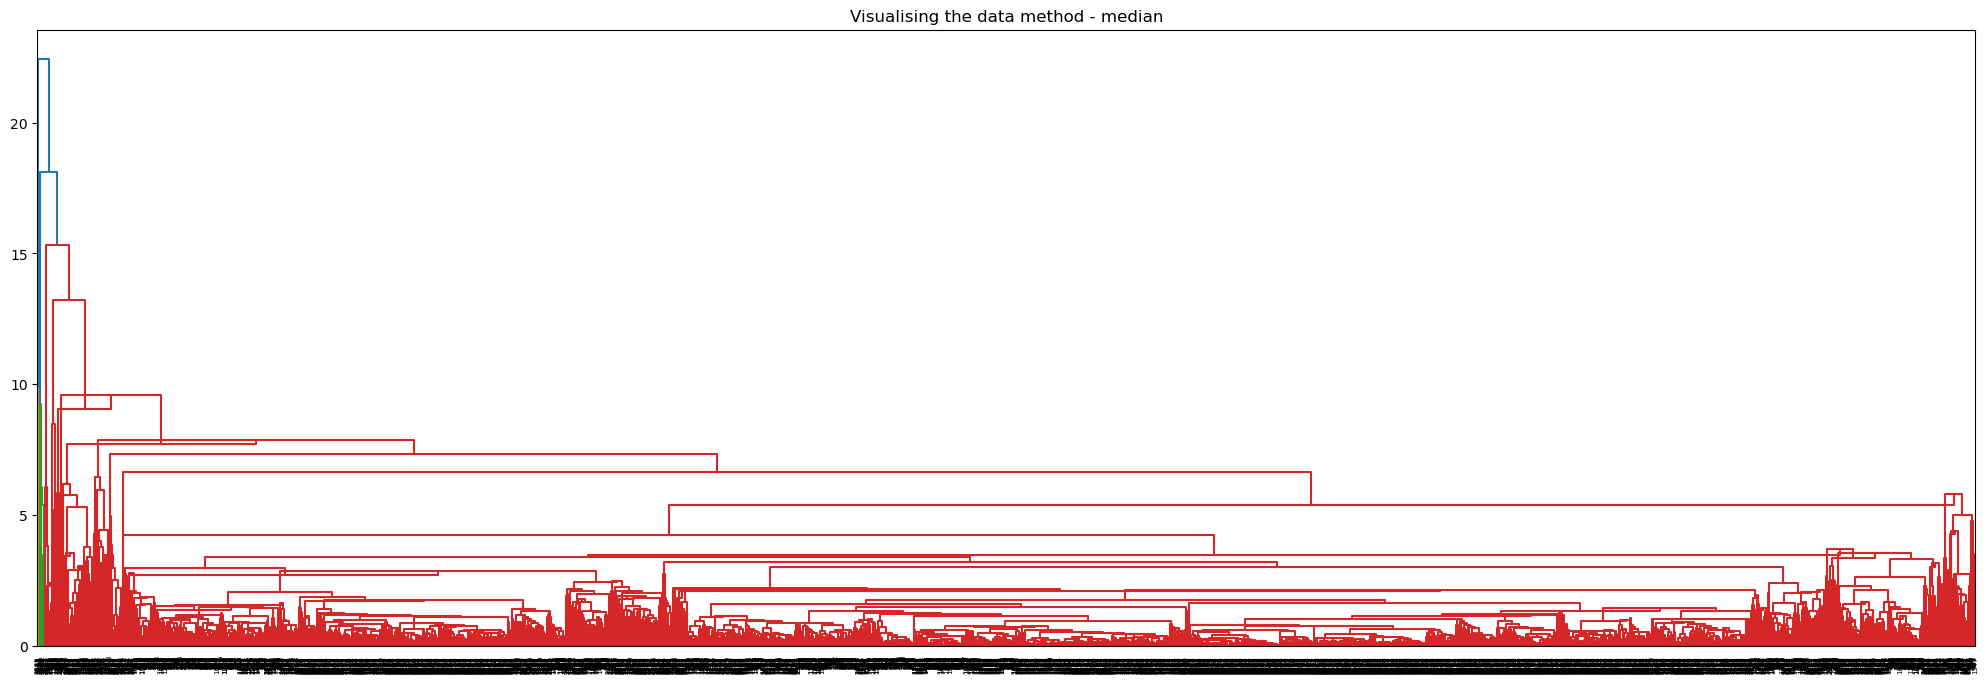

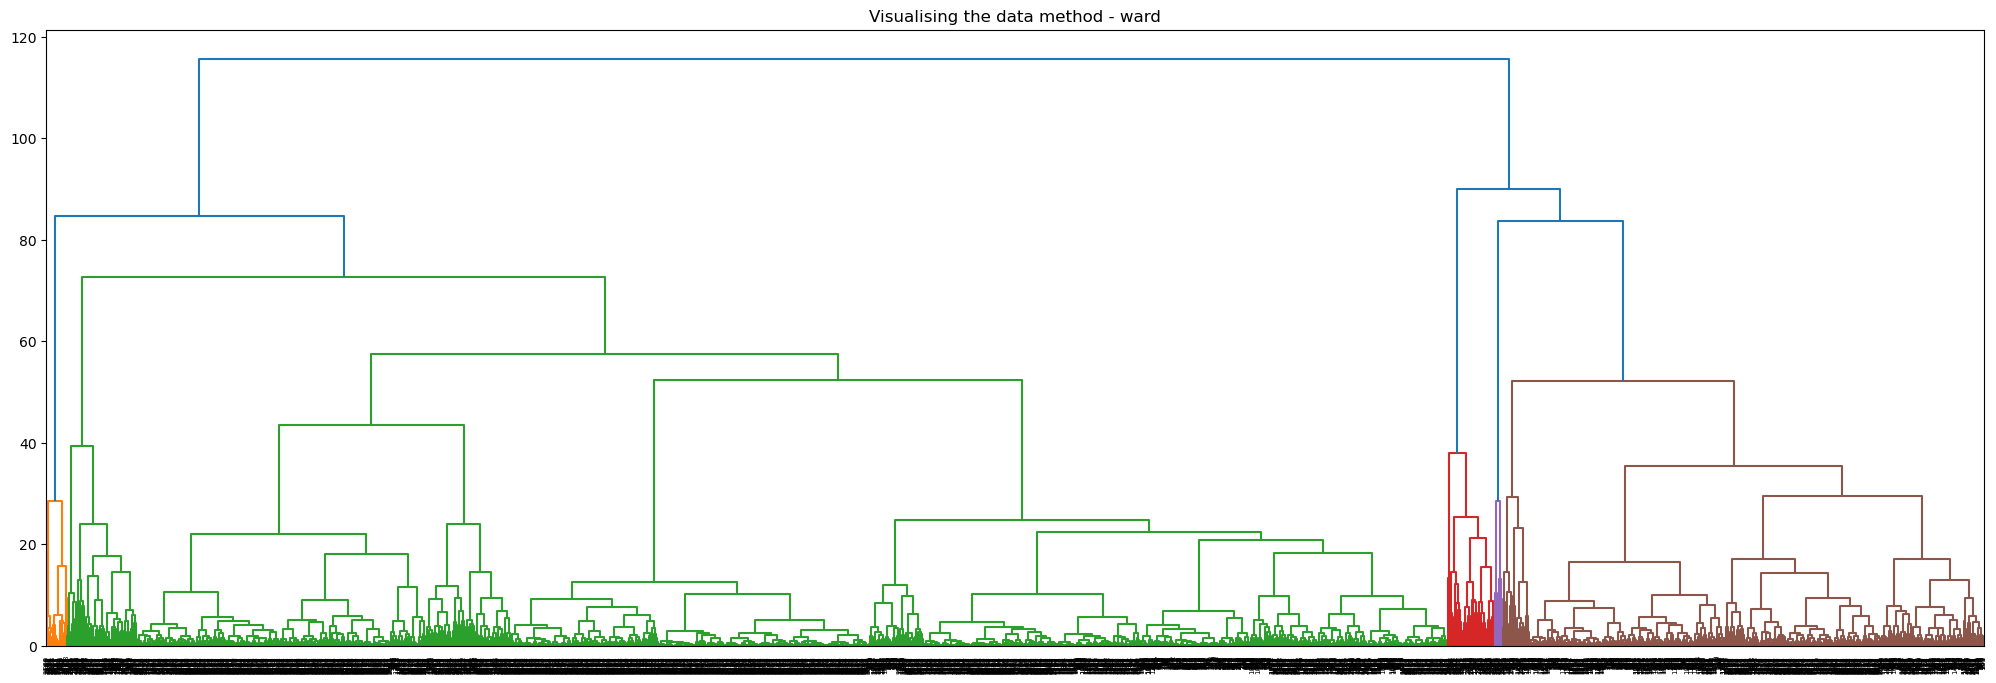

In [79]:
#Create dendrogram of standardized data for all methods
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize=(25,8))
    plt.title("Visualising the data method - {}".format(methods))
    Dendrogram = sch.dendrogram(sch.linkage(Airline_std,method=methods,optimal_ordering=False))

In [80]:
H_Cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
H_Cluster

AgglomerativeClustering(linkage='average', n_clusters=5)

In [81]:
Y_HC=H_Cluster.fit_predict(Airline_std)
Y_HC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
Data1_HC=Data1

In [83]:
Data1_HC['HC_Cluster ID']=Y_HC

In [84]:
Data1_HC

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HC_Cluster ID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [85]:
Data1_HC.groupby('HC_Cluster ID').agg(['count'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,count,count,count,count,count,count,count,count,count,count,count,count
HC_Cluster ID,,,,,,,,,,,,
0,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979
1,15,15,15,15,15,15,15,15,15,15,15,15
2,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1


# DBSCAN

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [87]:
Airline_data= pd.read_excel('C://Users/Hp/Desktop/Data Science Assignment/CLUSTERING/EastWestAirlines.xlsx',sheet_name='data')

In [88]:
Airline_data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [89]:
df=Airline_data.drop(['ID','Award'],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [90]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [91]:
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [92]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan.fit(scaled_data)

DBSCAN()

In [93]:
dbscan.labels_

array([0, 0, 0, ..., 5, 0, 0], dtype=int64)

In [94]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusters'])

In [95]:
cl

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,5
3997,0


In [96]:
clustered=pd.concat([Airline_data,cl],axis=1)

In [97]:
clustered

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [98]:
clustered.groupby('clusters').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,,
-1,1729.375915,140415.869813,468.929211,2.706265,1.041497,1.03987,32902.521562,18.489015,1335.395443,3.890968,4685.694060,0.587469
0,2291.831849,30375.941537,0.000000,1.000000,1.000000,1.00000,2386.295657,4.986080,87.432071,0.314031,3591.285635,0.177060
1,2094.169492,50802.412429,0.000000,2.000000,1.000000,1.00000,8437.830508,13.045198,16.638418,0.067797,3975.672316,0.327684
2,1215.200000,92542.575000,0.000000,5.000000,1.000000,1.00000,63962.775000,16.475000,18.750000,0.100000,5444.525000,0.750000
3,321.857143,43720.571429,0.000000,2.000000,1.000000,1.00000,11570.571429,21.857143,35.714286,0.142857,7035.571429,0.285714
4,1706.794118,80270.514706,0.000000,4.000000,1.000000,1.00000,37279.860294,16.121324,59.761029,0.194853,4676.959559,0.555147
5,1903.084862,64436.461009,0.000000,3.000000,1.000000,1.00000,18324.389908,14.903670,45.401376,0.165138,4286.080275,0.426606
6,297.000000,138516.800000,0.000000,2.000000,1.000000,1.00000,8307.800000,11.600000,0.000000,0.000000,7823.200000,0.000000
